### Transfer Learning 

Deep convolutional neural network models may take days or even weeks to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models

Transfer learning involves using models trained on one problem as a starting point on a related problem.

##### ImageNet Dataset

More than 14 million images have been hand-annotated by the project to indicate what objects are pictured and in at least one million of the images, bounding boxes are also provided.
ImageNet contains more than 20,000 categories[2] with a typical category, such as "balloon" or "strawberry", consisting of several hundred images.

#### Available Transfer learning models

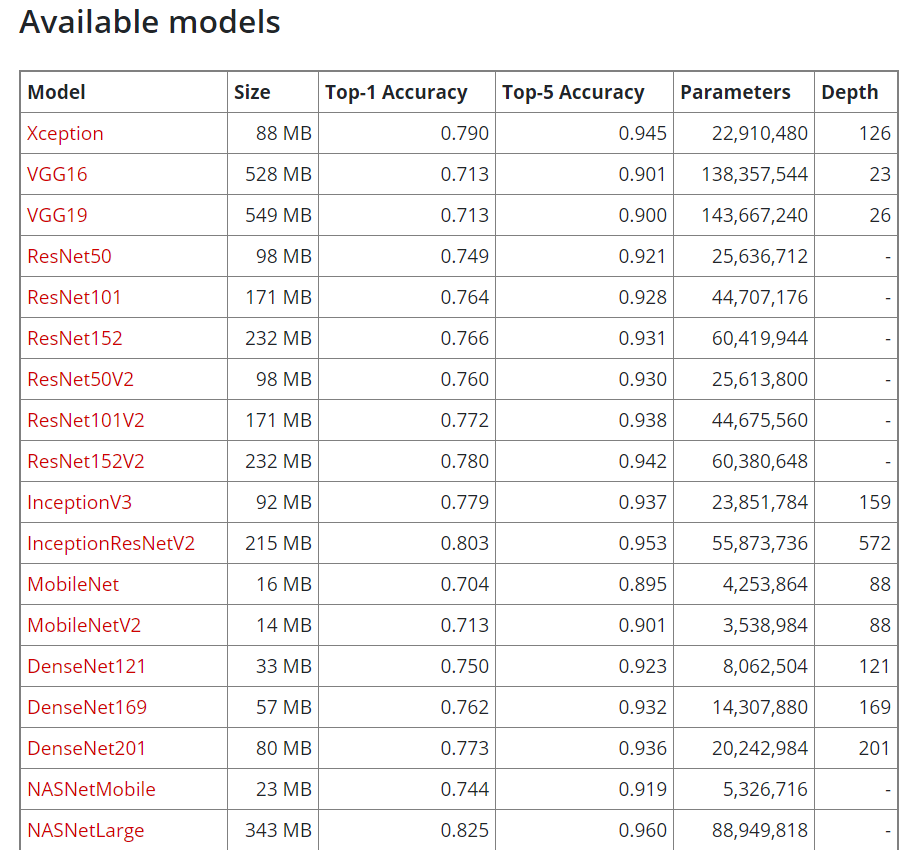

### We will create a Generic Template code through which you can use any transfer learning model

### Transfer Learning - For VGG16

In [13]:
## Through these we will create last layer 
## Suppose we have 4 categories in train dataset -- These will be created using Dense

### In Transfer learning we cut down last layer of VGG16 and append our No of Output Categories via Dense layer

from keras.layers import Input, Lambda, Dense, Flatten 
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
!unzip "dataset.zip" -d "dataset"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/dataset/training_set/cats/cat.3700.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3701.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3702.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3703.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3704.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3705.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3706.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3707.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3708.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3709.jpg  
  inflating: dataset/dataset/training_set/cats/cat.371.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3710.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3711.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3712.jpg  
  inflating: dataset/dataset/training_set/cats/cat.3713.jpg  
  inflating: dataset

In [14]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'dataset/dataset/training_set'
valid_path = 'dataset/dataset/test_set'

### Add preprocessing layer to front of VGG

+[3] is added becuase of no of channels , Because we have images in RGB channel

+[1] if you have black and white images

We will use pretrained weights of VGG 16 which was trained on Imagenet dataset

If we set include_top=False means we will not add Last / output layer of VGG16

In [15]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

### Now we will not train the layers of VGG16

Because Weigths are already trained by VGG16

In [16]:
for layer in vgg.layers:
  layer.trainable = False

### Get No of classes 

In [17]:
  # useful for getting number of classes
folders = glob('dataset/dataset/training_set/*')
folders

['dataset/dataset/training_set/dogs', 'dataset/dataset/training_set/cats']

### Add our model Layers 

In [18]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)

### Appending of last layer with VGG16 
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [19]:
# tell the model what cost and optimization method to use


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

#### Data Augmentation and Training

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('dataset/dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

print(len(training_set))
print(len(test_set))

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
250
63


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
250/250 [==============================] - 122s 455ms/step - loss: 0.5676 - accuracy: 0.7786 - val_loss: 0.1878 - val_accuracy: 0.9185
Epoch 2/5
250/250 [==============================] - 112s 449ms/step - loss: 0.1945 - accuracy: 0.9206 - val_loss: 0.3544 - val_accuracy: 0.8625
Epoch 3/5
250/250 [==============================] - 110s 440ms/step - loss: 0.1856 - accuracy: 0.9240 - val_loss: 0.2581 - val_accuracy: 0.8975
Epoch 4/5
250/250 [==============================] - 110s 440ms/step - loss: 0.1604 - accuracy: 0.9338 - val_loss: 0.2210 - val_accuracy: 0.9210
Epoch 5/5
250/250 [==============================] - 109s 436ms/step - loss: 0.1553 - accuracy: 0.9410 - val_loss: 0.2337 - val_accuracy: 0.9285


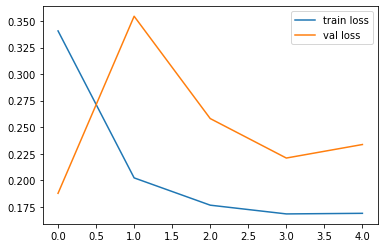

<Figure size 432x288 with 0 Axes>

In [21]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

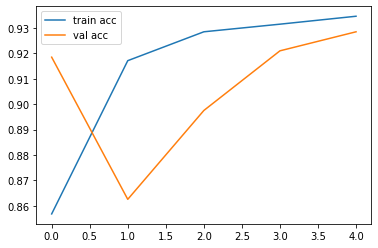

<Figure size 432x288 with 0 Axes>

In [23]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
import tensorflow as tf

from keras.models import load_model

model.save('transferlearning_model_Catdog.h5')

Now if you want to use other transfer learning model Change 2 things

from keras.applications.resnet50 import ResNet50 \
resnet  = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

And whereever you find vgg replace it with resnet


#### CNN Model without Transfer Learning

In [28]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 250,
                         epochs= 5,
                         validation_data = test_set,
                         validation_steps= 63)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
250/250 [==============================] - 31s 123ms/step - loss: 0.6927 - accuracy: 0.5151 - val_loss: 0.6900 - val_accuracy: 0.5105
Epoch 2/5
250/250 [==============================] - 30s 122ms/step - loss: 0.6798 - accuracy: 0.5718 - val_loss: 0.6690 - val_accuracy: 0.5690
Epoch 3/5
250/250 [==============================] - 30s 122ms/step - loss: 0.6674 - accuracy: 0.5922 - val_loss: 0.6511 - val_accuracy: 0.6170
Epoch 4/5
250/250 [==============================] - 31s 123ms/step - loss: 0.6506 - accuracy: 0.6222 - val_loss: 0.6405 - val_accuracy: 0.6320
Epoch 5/5
250/250 [==============================] - 31s 124ms/step - loss: 0.6434 - accuracy: 0.6230 - val_loss: 0.6258 - val_accuracy: 0.6470


#### Now you can see that Accuracy and Validation Accuracy without Transfer learning model is around 65% in 5 epochs

#### And with transfer learning model , Accuracy and Validation accuracy is around 90% in 5 epochs

#### You can clearly see the difference when you use Transfer Learning Models 